In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#AllCommon_PCA.txt  is an output from our CommonUniqueVariants.py
df = pd.read_csv("AllCommon_PCA.txt", sep='\t')
X = df.iloc[:,1:334].values
y = df.iloc[:,0].values
y


array(['sample1_final_filtered_snps_cancer',
       'sample2_final_filtered_snps_cancer',
       'sample3_final_filtered_snps_cancer',
       'sample4_final_filtered_snps_cancer',
       'sample5_final_filtered_snps_cancer',
       'sample6_final_filtered_snps_cancer',
       'sample7_final_filtered_snps_cancer'], dtype=object)

In [101]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.16666667, ..., -0.38038762,
         0.64465706,  0.697801  ],
       ...,
       [ 0.        ,  0.        , -0.38038762, ...,  1.16666667,
        -0.37584349, -0.18781573],
       [ 0.        ,  0.        ,  0.64465706, ..., -0.37584349,
         1.16666667,  1.13213489],
       [ 0.        ,  0.        ,  0.697801  , ..., -0.18781573,
         1.13213489,  1.16666667]])

In [102]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("EIGEN_VALUES", eig_vals)
print("EIGEN_VECTORS", eig_vecs)

EIGEN_VALUES [ 1.01597426e+02+0.00000000e+00j  4.12346528e+01+0.00000000e+00j
  3.61778970e+01+0.00000000e+00j  3.10383275e+01+0.00000000e+00j
  2.57021818e+01+0.00000000e+00j  2.09161818e+01+0.00000000e+00j
 -6.81736094e-15+0.00000000e+00j  6.16793143e-15+0.00000000e+00j
 -4.72381829e-15+2.19528766e-16j -4.72381829e-15-2.19528766e-16j
  1.49101994e-15+4.43796467e-15j  1.49101994e-15-4.43796467e-15j
 -2.31448022e-15+3.77843668e-15j -2.31448022e-15-3.77843668e-15j
  3.44556267e-15+2.91455496e-15j  3.44556267e-15-2.91455496e-15j
 -2.54426646e-15+3.10438412e-15j -2.54426646e-15-3.10438412e-15j
  3.89380447e-15+1.09179375e-15j  3.89380447e-15-1.09179375e-15j
  3.05550840e-15+2.45514080e-15j  3.05550840e-15-2.45514080e-15j
 -3.49701298e-15+1.48290385e-15j -3.49701298e-15-1.48290385e-15j
  3.84016016e-15+6.44974351e-17j  3.84016016e-15-6.44974351e-17j
 -7.25421386e-16+3.59404557e-15j -7.25421386e-16-3.59404557e-15j
 -1.60708312e-16+3.39532245e-15j -1.60708312e-16-3.39532245e-15j
 -2.77267580

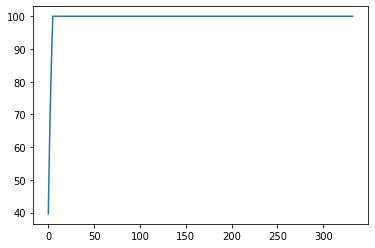

In [104]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#plt.plot(var_exp) #Individual
plt.plot(cum_var_exp) #Cumulative

In [106]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
matrix_w = np.hstack((eig_pairs[0][1].reshape(333,1), 
                      eig_pairs[1][1].reshape(333,1)))

In [107]:
Y = X_std.dot(matrix_w)
Y

array([[-16.4117793 +0.j,   0.57094078+0.j],
       [  9.71432622+0.j,  -5.20136521+0.j],
       [  5.99228476+0.j,  -8.35467071+0.j],
       [  4.63098194+0.j,   0.05085309+0.j],
       [-12.07767535+0.j,  -2.6371495 +0.j],
       [  1.90570232+0.j,   4.46636153+0.j],
       [  6.24615941+0.j,  11.10503002+0.j]])

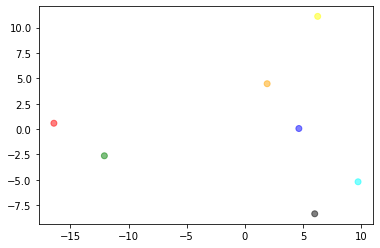

In [109]:
data = []
classes = y

colors = ('red', 'cyan', 'black', 'blue', 'green', 'orange', 'yellow')

cx = []
cy = []
for name, col in zip(classes, colors):
    cx.append(Y[y==name,0][0])
    cy.append(Y[y==name,1][0])
    
plt.scatter(cx, cy, c=colors, alpha=0.5)


<Figure size 1800x1000 with 0 Axes>

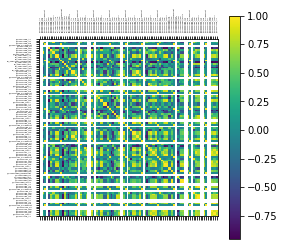

In [110]:
import seaborn as sns
corr = df.corr()
l = corr.iloc[:100,:100]
plt.figure(figsize=(36,20), dpi=50)
plt.matshow(l)
plt.xticks(range(len(l.columns)), l.columns, fontsize=2, rotation='vertical')
plt.yticks(range(len(l.columns)), l.columns, fontsize=2)
plt.colorbar()
plt.savefig("correlation_matrix.pdf")
